# **Importação das bibliotecas**


In [72]:
pip install mysql-connector-python

In [73]:
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Conexão com o Banco de Dados**


In [74]:
conexao = mysql.connector.connect(
    host='node164378-projetoembraer.jelastic.saveincloud.net',
    port='15207',
    user='root',
    password='IKPtgh58743',
    database='Projetofinal',
)

# **Dataframe de Pedidos**

In [75]:
t1_pedidos = 'VW_STATUS_TRANSPORTE'

In [76]:
query = f'SELECT * FROM {t1_pedidos}'

In [77]:
df_pedidos = pd.read_sql(query, conexao)

<ipython-input-77-81f0e1622e66>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pedidos = pd.read_sql(query, conexao)


In [78]:
df_pedidos.head()

,id,id_original,id_produto,id_cliente,id_funcionario,tempo_aprovacao,tempo_separacao,tempo_faturamento,tempo_coleta,tempo_transporte,status
0,1,5006727080,PE003,1024,129,1.0,0.0,1.0,1.0,1.0,No prazo
1,2,5007152618,PE005,1717,103,1.0,0.0,2.0,0.0,8.0,Atrasado
2,3,5006408758,ES002,1581,106,1.0,0.0,1.0,0.0,2.0,No prazo
3,4,5007384908,CO004,1642,121,1.0,1.0,1.0,1.0,3.0,No prazo
4,5,5006640440,PE003,1291,113,1.0,2.0,0.0,1.0,6.0,Atrasado


In [79]:
len(df_pedidos)

500

**Cálculo Lead Time**

In [80]:
colunas_tempo = ['tempo_aprovacao', 'tempo_separacao', 'tempo_separacao', 'tempo_coleta','tempo_transporte']

In [81]:
df_pedidos['lead_time'] = df_pedidos[colunas_tempo].sum(axis=1)

In [82]:
df_pedidos

,id,id_original,id_produto,id_cliente,id_funcionario,tempo_aprovacao,tempo_separacao,tempo_faturamento,tempo_coleta,tempo_transporte,status,lead_time
0,1,5006727080,PE003,1024,129,1.0,0.0,1.0,1.0,1.0,No prazo,3.0
1,2,5007152618,PE005,1717,103,1.0,0.0,2.0,0.0,8.0,Atrasado,9.0
2,3,5006408758,ES002,1581,106,1.0,0.0,1.0,0.0,2.0,No prazo,3.0
3,4,5007384908,CO004,1642,121,1.0,1.0,1.0,1.0,3.0,No prazo,7.0
4,5,5006640440,PE003,1291,113,1.0,2.0,0.0,1.0,6.0,Atrasado,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,708,5007628031,PN002,1881,115,2.0,3.0,1.0,3.0,5.0,Atrasado,16.0
496,709,5007626446,PN002,1881,115,2.0,3.0,1.0,3.0,9.0,Atrasado,20.0
497,710,5007626243,PN002,1881,115,2.0,3.0,1.0,3.0,4.0,No prazo,15.0
498,711,5007626677,PN002,1881,115,2.0,3.0,1.0,3.0,9.0,Atrasado,20.0


# **Dataframe Clientes**

In [83]:
t5_clientes = 't5_clientes'

In [84]:
query_2 = f'SELECT * FROM {t5_clientes}'

In [85]:
df_clientes = pd.read_sql(query_2, conexao)

<ipython-input-85-cc909fef1cec>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clientes = pd.read_sql(query_2, conexao)


In [86]:
df_clientes

,cliente_cnpj,cliente_codigo,cliente_nome,cliente_cidade,cliente_uf,cliente_regiao
0,02.394.049/0002-69,1600,SkyVista Airways,Belo Horizonte,MG,Sudeste
1,02.394.049/0003-40,1998,AeroLink Express,Manaus,AM,Norte
2,02.394.049/0005-09,1346,HorizonJet International,Recife,PE,Nordeste
3,02.394.049/0008-54,1291,StarWing Airlines,Porto Alegre,RS,Sul
4,02.394.049/0009-35,1631,BlueSkies Travel,Goiânia,GO,Centro-Oeste
5,02.394.049/0023-93,1586,GlobalFlyer Airways,Fortaleza,CE,Nordeste
6,02.394.049/0025-55,1581,AirHarmony Express,Brasília,DF,Centro-Oeste
7,02.394.049/0028-06,1403,QuantumAir Ventures,Salvador,BA,Nordeste
8,02.394.049/0029-89,1789,SwiftCruise Airlines,Cuiabá,MT,Centro-Oeste
9,02.394.049/0030-92,1464,AeroGlobe Connect,Florianópolis,SC,Sul


In [87]:
len(df_clientes)

19

# **União das tabelas Pedidos e Clientes**

In [88]:
pedidos_clientes = pd.merge(df_pedidos, df_clientes, left_on='id_cliente', right_on='cliente_codigo', how='inner')

In [89]:
pedidos_clientes

,id,id_original,id_produto,id_cliente,id_funcionario,tempo_aprovacao,tempo_separacao,tempo_faturamento,tempo_coleta,tempo_transporte,status,lead_time,cliente_cnpj,cliente_codigo,cliente_nome,cliente_cidade,cliente_uf,cliente_regiao
0,1,5006727080,PE003,1024,129,1.0,0.0,1.0,1.0,1.0,No prazo,3.0,02.394.049/0030-92,1024,SkyQuest International,Rio de Janeiro,RJ,Sudeste
1,60,5007206195,CO004,1024,109,1.0,0.0,1.0,0.0,3.0,Atrasado,4.0,02.394.049/0030-92,1024,SkyQuest International,Rio de Janeiro,RJ,Sudeste
2,83,5006804610,PN002,1024,119,1.0,0.0,0.0,1.0,2.0,Atrasado,4.0,02.394.049/0030-92,1024,SkyQuest International,Rio de Janeiro,RJ,Sudeste
3,91,5007442772,ES003,1024,109,1.0,1.0,1.0,1.0,3.0,Atrasado,7.0,02.394.049/0030-92,1024,SkyQuest International,Rio de Janeiro,RJ,Sudeste
4,114,5006641752,CO004,1024,109,0.0,0.0,1.0,1.0,2.0,Atrasado,3.0,02.394.049/0030-92,1024,SkyQuest International,Rio de Janeiro,RJ,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,240,5006769273,CO005,1789,108,0.0,2.0,0.0,1.0,NaN,No prazo,5.0,02.394.049/0029-89,1789,SwiftCruise Airlines,Cuiabá,MT,Centro-Oeste
496,243,5006990705,PE004,1789,128,1.0,2.0,0.0,0.0,3.0,Adiantado,8.0,02.394.049/0029-89,1789,SwiftCruise Airlines,Cuiabá,MT,Centro-Oeste
497,255,5007580100,ES004,1789,128,0.0,1.0,0.0,1.0,NaN,No prazo,3.0,02.394.049/0029-89,1789,SwiftCruise Airlines,Cuiabá,MT,Centro-Oeste
498,284,5006589002,ES004,1789,128,1.0,NaN,NaN,NaN,NaN,No prazo,1.0,02.394.049/0029-89,1789,SwiftCruise Airlines,Cuiabá,MT,Centro-Oeste


**Limpeza dos valores nulos**

In [90]:
df_pedidos_clientes = pedidos_clientes.dropna()

#**Verificação dos tipos das variáveis e criação de variável dummie**


In [91]:
df_pedidos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 496
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 430 non-null    int64  
 1   id_original        430 non-null    object 
 2   id_produto         430 non-null    object 
 3   id_cliente         430 non-null    object 
 4   id_funcionario     430 non-null    object 
 5   tempo_aprovacao    430 non-null    float64
 6   tempo_separacao    430 non-null    float64
 7   tempo_faturamento  430 non-null    float64
 8   tempo_coleta       430 non-null    float64
 9   tempo_transporte   430 non-null    float64
 10  status             430 non-null    object 
 11  lead_time          430 non-null    float64
 12  cliente_cnpj       430 non-null    object 
 13  cliente_codigo     430 non-null    object 
 14  cliente_nome       430 non-null    object 
 15  cliente_cidade     430 non-null    object 
 16  cliente_uf         430 non

**Exclusão das variaveis que não achamos interessantes**

In [92]:
df_final = df_pedidos_clientes.drop(['id', 'id_original','id_produto','id_cliente','id_funcionario','status','cliente_cnpj','cliente_codigo','cliente_nome','cliente_cidade','cliente_uf'], axis=1)

In [93]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 496
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tempo_aprovacao    430 non-null    float64
 1   tempo_separacao    430 non-null    float64
 2   tempo_faturamento  430 non-null    float64
 3   tempo_coleta       430 non-null    float64
 4   tempo_transporte   430 non-null    float64
 5   lead_time          430 non-null    float64
 6   cliente_regiao     430 non-null    object 
dtypes: float64(6), object(1)
memory usage: 26.9+ KB


**Criação da variável dummie "Região"**

In [94]:
dummy_r = pd.get_dummies(df_final['cliente_regiao'], prefix='cliente_regiao_')

In [95]:
base = pd.concat([df_final,dummy_r], axis=1)

In [96]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 496
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tempo_aprovacao               430 non-null    float64
 1   tempo_separacao               430 non-null    float64
 2   tempo_faturamento             430 non-null    float64
 3   tempo_coleta                  430 non-null    float64
 4   tempo_transporte              430 non-null    float64
 5   lead_time                     430 non-null    float64
 6   cliente_regiao                430 non-null    object 
 7   cliente_regiao__Centro-Oeste  430 non-null    uint8  
 8   cliente_regiao__Nordeste      430 non-null    uint8  
 9   cliente_regiao__Norte         430 non-null    uint8  
 10  cliente_regiao__Sudeste       430 non-null    uint8  
 11  cliente_regiao__Sul           430 non-null    uint8  
dtypes: float64(6), object(1), uint8(5)
memory usage: 29.0+ KB


**Exclusão a variável original da base**

In [97]:
df_base = base.drop(['cliente_regiao'], axis=1)

# **Verificação da correlação das variáveis escolhidas com a variável target**

<Axes: >

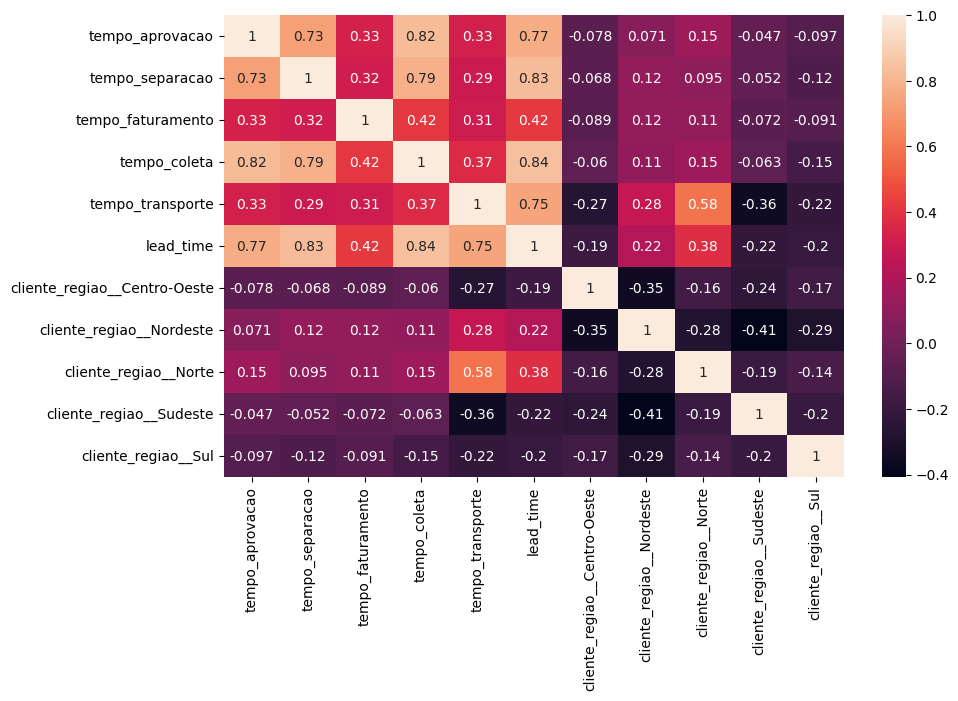

In [98]:
plt.figure(figsize = [10,6])
sns.heatmap(df_base.corr(), annot=True)

# **Modelo Regressão Múltipla**




**Escolhemos equilibrar as variáveis em virtude da multicolinearidade, temos mais de duas variáveis independentes no modelo que são altamente correlacionadas.**

**Entrada e saída do modelo**

In [99]:
X = df_base[['tempo_aprovacao','tempo_faturamento','cliente_regiao__Norte','cliente_regiao__Nordeste']]
y = df_base['lead_time']

**Divisão dos dados em treinamento e teste**

In [100]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

**Criação e treino do modelo**

In [101]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

**Previões no conjunto de teste**

In [102]:
y_pred = modelo.predict(X_teste)

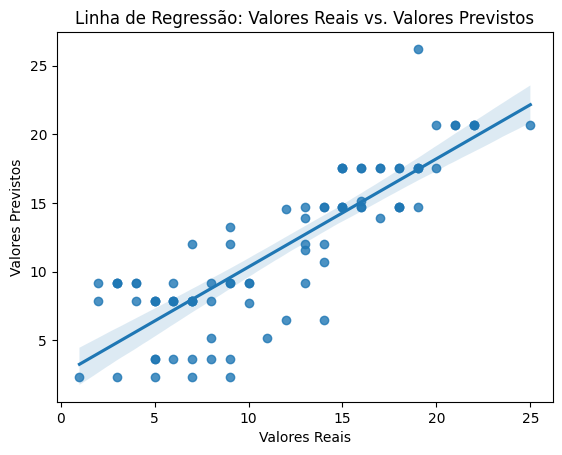

In [103]:
sns.regplot(x=y_teste, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Linha de Regressão: Valores Reais vs. Valores Previstos')
plt.show()

**Métricas de desempenho do modelo**

In [104]:
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 2.52
MSE: 10.14
R²: 0.71


**Um R² de 0.71 significa que aproximadamente 71% da variabilidade na variável dependente é explicada pelo modelo.**

**Coeficientes**

In [109]:
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': modelo.coef_})
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)

coeficientes['Coeficiente'] = coeficientes['Coeficiente'].round(2)

coeficientes = coeficientes.reset_index(drop=True)

print('\nCoeficientes do Modelo:')
print(coeficientes)


Coeficientes do Modelo:
                   Variável  Coeficiente
0     cliente_regiao__Norte         6.01
1           tempo_aprovacao         5.53
2  cliente_regiao__Nordeste         2.83
3         tempo_faturamento         1.28


**cliente_regiao__Norte:** Aumento médio de 6.01 unidades no lead_time quando o cliente está na região Norte.

**tempo_aprovacao**: Aumento médio de 5.53 unidades no lead_time para cada unidade adicional de tempo de aprovação.


**cliente_regiao__Nordeste:** Aumento médio de 2.83 unidades no lead_time quando o cliente está na região Nordeste.


**tempo_faturamento:** Aumento médio de 1.28 unidades no lead_time para cada unidade adicional de tempo de faturamento.